In [1]:
import pandas as pd # Modul for dataframe
import numpy as np # for scientific computing (math high level)
import matplotlib.pyplot as plt # Modul Visualization
import seaborn as sns # Modul Visualization

In [2]:
# Make data so that mix if want split data train or test
def Importdata(file):
    """
    Function for import data and drop duplicate
    param : Function (file<input file name>) just format (csv)
    return data
    """
    
    data = pd.read_csv(file, sep=';', skiprows=0)
    print("Data real            : ", data.shape, "- (#observation, #column)")

    data = data.drop_duplicates()
    print("after drop data : ", data.shape, "- (#observation, #column)")
    
    return data

In [3]:
#input
file_data = "bank-full.csv"

#call function
data_analisa = Importdata(file = file_data)

Data real            :  (45211, 17) - (#observation, #column)
after drop data :  (45211, 17) - (#observation, #column)


In [4]:
# drop columns not used
data_analisa = data_analisa.drop(columns=['age','day','campaign','pdays','previous','balance'])

# Data Splitting

In [5]:
# make function separate input, output
def SeparateOutputInput(data,
                       output_column_name):
    """
    The Function for separate data input and output
    input data for target/output and the drop or separate
    make new variable for input and output data
    """
    
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name,
                           axis = 1)
    
    return input_data, output_data

In [6]:
# call function
X, y = SeparateOutputInput(data = data_analisa,
                          output_column_name = "y")

In [7]:
X.head(2) # for data input
y.head(2) # for data output

0    no
1    no
Name: y, dtype: object

In [8]:
# Train test split
from sklearn.model_selection import train_test_split #splitting data test and train

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify = y, # because inbalance data
                                                    test_size = 0.2, # split 20% data
                                                    random_state = 123)
# print shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 10), (9043, 10), (36168,), (9043,))

In [9]:
y_train.value_counts(normalize = True)

# Baseline accurate is 88%

no     0.883018
yes    0.116982
Name: y, dtype: float64

In [10]:
# Ratio
X_test.shape[0] / X.shape[0]

# Hasil 0.20 - same with test_size

0.20001769480878548

In [11]:
# sanicheck
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36168 entries, 15136 to 40175
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        36168 non-null  object
 1   marital    36168 non-null  object
 2   education  36168 non-null  object
 3   default    36168 non-null  object
 4   housing    36168 non-null  object
 5   loan       36168 non-null  object
 6   contact    36168 non-null  object
 7   month      36168 non-null  object
 8   duration   36168 non-null  int64 
 9   poutcome   36168 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.0+ MB


# Data Preprocessing

In [12]:
# Split data numeric
numeric_column = ['duration'] # column used
numeric_column

['duration']

In [13]:
# split data train category
categorical_col = list(set(X_train.columns) - set(numeric_column))

In [14]:
# split data test category
categorical_col_test = list(set(X_test.columns) - set(numeric_column))

In [16]:
def splitNumCat(data, num_col, cat_col):
    """"
    Function for split category between numeric
    data_num = input data split numeric
    data_cat = input data split category
    """
    data_num = data[num_col]
    data_cat = data[cat_col]

    return data_num, data_cat

In [17]:
# call function X_train
X_train_num, X_train_cat = splitNumCat(data = X_train,
                                       num_col = numeric_column,
                                       cat_col = categorical_col)

In [18]:
# call function X_test
X_test_num, X_test_cat = splitNumCat(data = X_test,
                                       num_col = numeric_column,
                                       cat_col = categorical_col_test)

# Handling missing values numeric

In [19]:
# make function imputer numeric take care if have missing nulls
from sklearn.impute import SimpleImputer

def imputerNum(data, imputer = None):
    """"
    This ImputerNum for check missing valus
    and if there are missing values make median
    """"
    if imputer == None:
        # Buat imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median") # make median becauses data is skew
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer

In [20]:
# data test
X_train_num_imputed, imputer_num = imputerNum(data = X_train_num)

# data test
X_test_num_imputed, imputer_num_test = imputerNum(data = X_test_num)

# Handling missing values Category

In [21]:
# make function imputer category take care if have missing nulls
def imputerCat(data, imputer = None):
    """"
    This ImputerCat for check missing valus
    and if there are missing values make UNKNOWN
    """"
    if imputer == None:
        # Buat imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "constant", # Identification data
                                fill_value = "UNKNOWN") # change values
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer

In [22]:
# data train
X_train_cat_imputed, imputer_cat = imputerCat(data = X_train_cat)

# data test
X_test_cat_imputed, imputer_cat_test = imputerCat(data = X_test_cat)

# OHE

In [23]:
# OHE from X_train
categorical_ohe = pd.get_dummies(X_train_cat_imputed)

# OHE from X_test
categorical_ohe_test = pd.get_dummies(X_test_cat_imputed)

In [24]:
# concat data X_train
X_train_concat = pd.concat([X_train_num_imputed, categorical_ohe],
                           axis = 1)

In [25]:
# concat data X_test
X_test_concat = pd.concat([X_test_num_imputed, categorical_ohe_test],
                           axis = 1)

In [26]:
from sklearn.preprocessing import LabelEncoder #modul for encoder categoric values
le = LabelEncoder() 

# y_train
y_train = le.fit_transform(y_train)

# y_test
y_test = le.fit_transform(y_test)

In [27]:
# sanicheck
y_train.shape, y_test.shape

((36168,), (9043,))

In [28]:
y_train_copy = y_train.copy()

# Make Model Random Forest

In [29]:
from imblearn.over_sampling import SMOTE # modul for convert data imbalance to balance

In [30]:
# Buat objek
smt = SMOTE(sampling_strategy = "minority", # sampling base on minority
            random_state = 123)

# Fit objek
X_train_smote, y_train = smt.fit_resample(X_train_concat, y_train)

In [31]:
# find performa
from sklearn.metrics import confusion_matrix # for check all metrics (TN,TP, FT, FN)
from sklearn.metrics import accuracy_score # for check accuracy scores
from sklearn.metrics import classification_report # for check all metrics
from sklearn.metrics import roc_curve # check curve roc 
from sklearn.metrics import auc # check auc value 

In [71]:
from sklearn.ensemble import RandomForestClassifier # modul RandomForestClassifier

# model RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 200) # hyperparamater model
clf.fit(X_train_smote, y_train) # fit model
y_pred = clf.predict(X_train_smote) # predict model train

In [72]:
# Show confusion matrix
confusion_matrix(y_train,
                 y_pred)

array([[31908,    29],
       [   85, 31852]], dtype=int64)

In [34]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Tampilkan score
print(classification_report(y_true = y_train,
                            y_pred = y_pred,
                            target_names = ["NO (0)", "YES (1)"]))

              precision    recall  f1-score   support

      NO (0)       1.00      1.00      1.00     31937
     YES (1)       1.00      1.00      1.00     31937

    accuracy                           1.00     63874
   macro avg       1.00      1.00      1.00     63874
weighted avg       1.00      1.00      1.00     63874



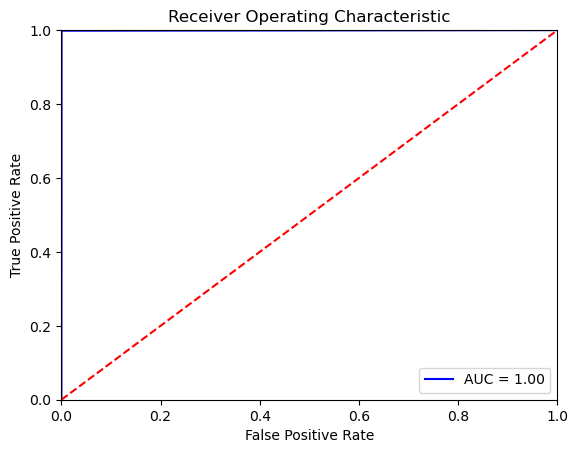

In [35]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train,
                                         y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

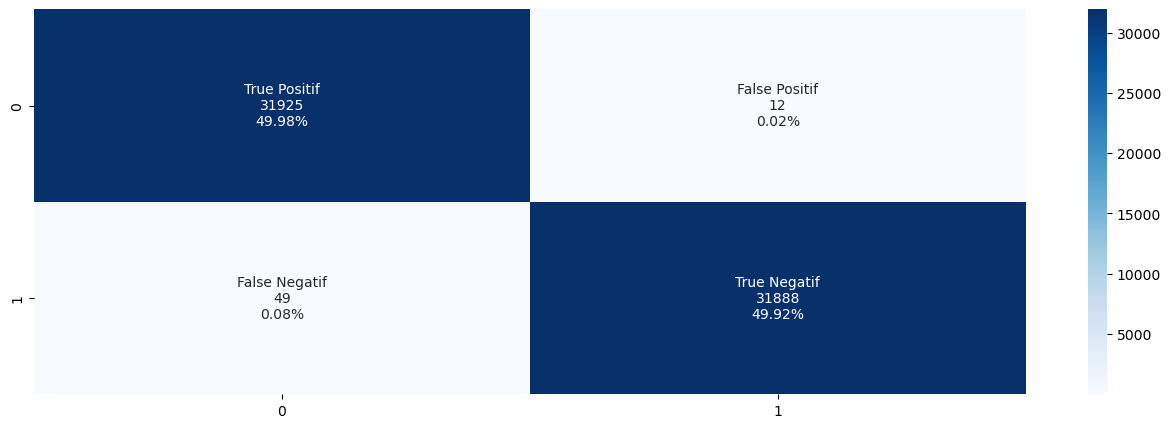

In [36]:
# look heatmap fn,fp,tp,tn

group_names = ['True Positif', 'False Positif', 'False Negatif', 'True Negatif'] # for label
test_cnf_matrix = confusion_matrix(y_train,y_pred) # input data test
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()] # format value
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)] # percentage of metric
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)] # looping metrics values
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

In [37]:
from sklearn.ensemble import RandomForestClassifier

# model RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 200)
clf.fit(X_train_smote, y_train)
y_pred_test = clf.predict(X_test_concat)

In [38]:
# show Cinfution Matrix
confusion_matrix(y_test,
                 y_pred_test)

array([[7527,  458],
       [ 585,  473]], dtype=int64)

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Tampilkan score
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test,
                            target_names = ["NO (0)", "YES (1)"]))

              precision    recall  f1-score   support

      NO (0)       0.93      0.94      0.94      7985
     YES (1)       0.51      0.45      0.48      1058

    accuracy                           0.88      9043
   macro avg       0.72      0.69      0.71      9043
weighted avg       0.88      0.88      0.88      9043



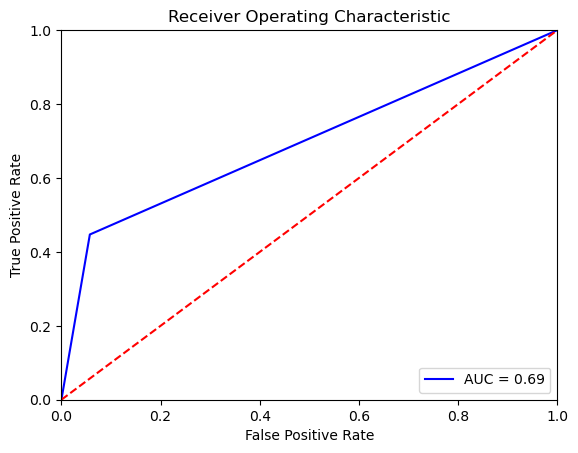

In [40]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

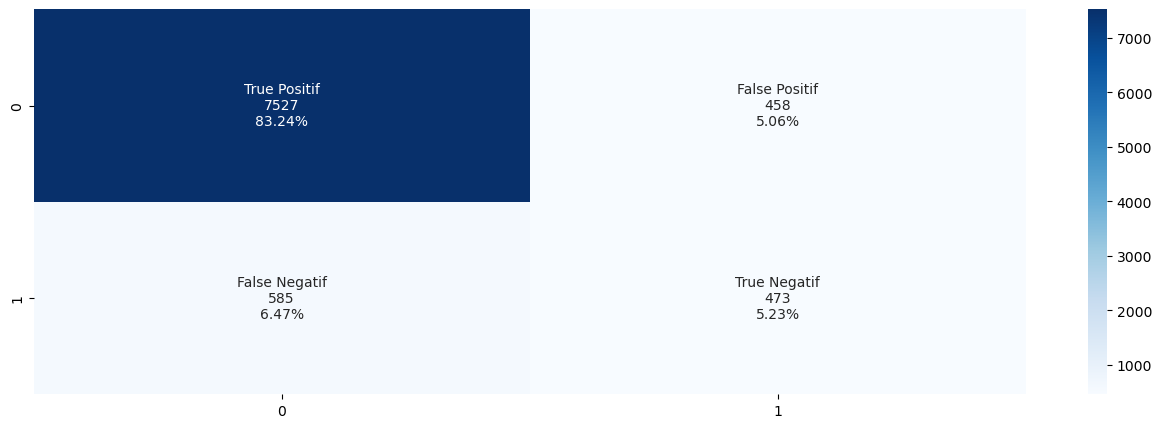

In [41]:
# look heatmap fn,fp,tp,tn

group_names = ['True Positif', 'False Positif', 'False Negatif', 'True Negatif'] # for label
test_cnf_matrix = confusion_matrix(y_test,y_pred_test) # input data test
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()] # format value
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)] # percentage of metric
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)] # looping metrics values
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

# Model Logistic Regression

In [42]:
from sklearn.preprocessing import StandardScaler # modul for standart

In [43]:
def standardizeData(data, scaler = None):
    """"
    This function used for convert data to
    standaritation or normal distribution 
    """"
    if scaler == None:
        # Buat & Fit scaler
        scaler = StandardScaler()
        scaler.fit(data)

    # Tranform data
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled,
                               index = data.index,
                               columns = data.columns)
    
    return data_scaled, scaler

In [44]:
# Make standaritation X_train
X_train_clean, scaler = standardizeData(data = X_train_concat)

# Make standaritation X_test
X_test_clean, scaler = standardizeData(data = X_test_concat)

In [46]:
from sklearn.linear_model import LogisticRegression # moduk LogisticRegression

logreg = LogisticRegression(class_weight="balanced") # make parameter
logreg.fit(X_train_clean, y_train_copy) # fit data train
y_pred_log = logreg.predict(X_train_clean) # predict data test

In [47]:
# show confution matrix
confusion_matrix(y_train_copy,
                 y_pred_log)

array([[27185,  4752],
       [  756,  3475]], dtype=int64)

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Tampilkan score
print(classification_report(y_true = y_train_copy,
                            y_pred = y_pred_log,
                            target_names = ["NO (0)", "YES (1)"]))

              precision    recall  f1-score   support

      NO (0)       0.97      0.85      0.91     31937
     YES (1)       0.42      0.82      0.56      4231

    accuracy                           0.85     36168
   macro avg       0.70      0.84      0.73     36168
weighted avg       0.91      0.85      0.87     36168



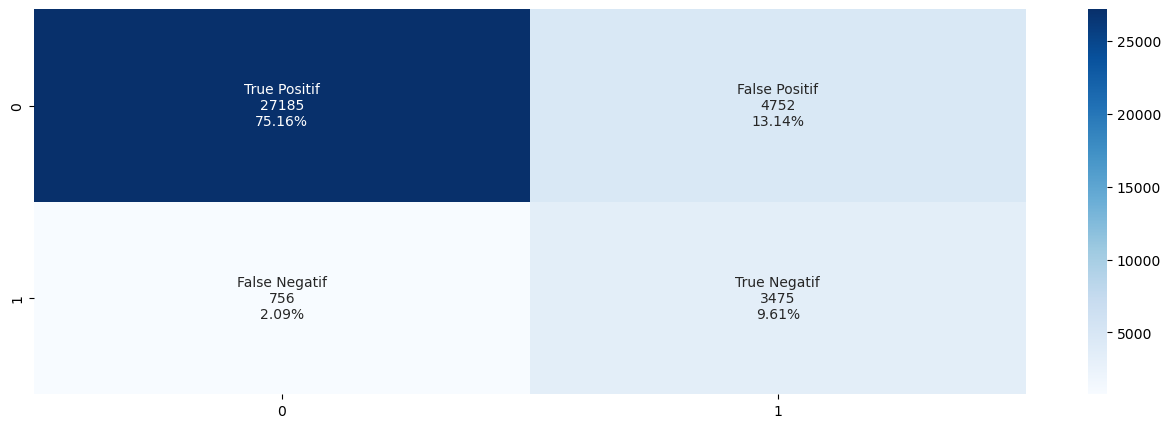

In [49]:
# look heatmap fn,fp,tp,tn

group_names = ['True Positif', 'False Positif', 'False Negatif', 'True Negatif'] # for label
test_cnf_matrix = confusion_matrix(y_train_copy,y_pred_log) # input data test
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()] # format value
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)] # percentage of metric
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)] # looping metrics values
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

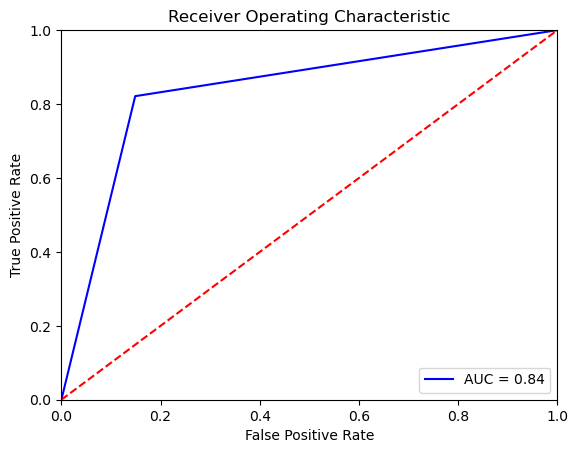

In [50]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train_copy,
                                         y_pred_log)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [51]:
# code for LogisticRegression
logreg = LogisticRegression(class_weight="balanced") # parameter
logreg.fit(X_train_clean, y_train_copy) # fit model
y_pred_log_test = logreg.predict(X_test_clean) #predict data test

In [52]:
# check Confusion metrics
confusion_matrix(y_test,
                 y_pred_log_test)

array([[6743, 1242],
       [ 225,  833]], dtype=int64)

In [53]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Tampilkan score
print(classification_report(y_true = y_test,
                            y_pred = y_pred_log_test,
                            target_names = ["NO (0)", "YES (1)"]))

              precision    recall  f1-score   support

      NO (0)       0.97      0.84      0.90      7985
     YES (1)       0.40      0.79      0.53      1058

    accuracy                           0.84      9043
   macro avg       0.68      0.82      0.72      9043
weighted avg       0.90      0.84      0.86      9043



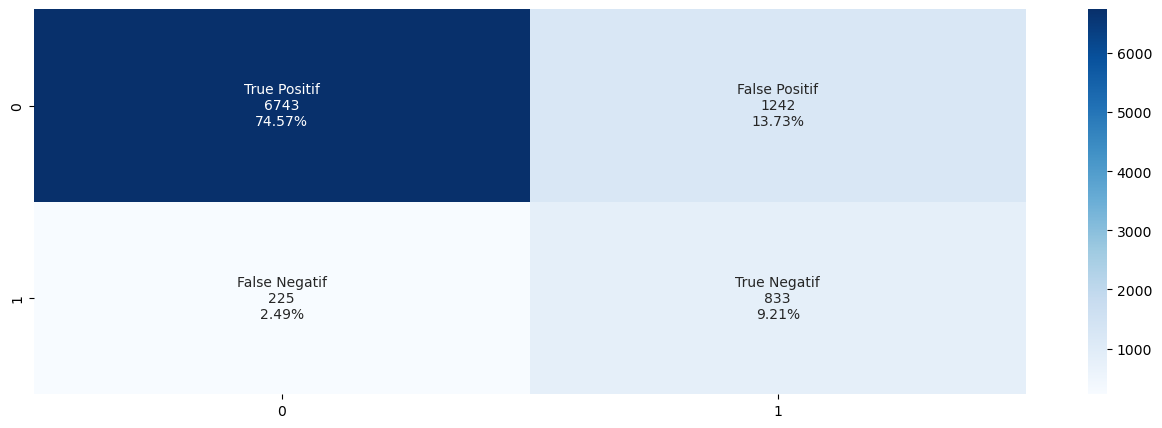

In [54]:
# look heatmap fn,fp,tp,tn

group_names = ['True Positif', 'False Positif', 'False Negatif', 'True Negatif'] # for label
test_cnf_matrix = confusion_matrix(y_test,y_pred_log_test) # input data test
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()] # format value
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)] # percentage of metric
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)] # looping metrics values
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

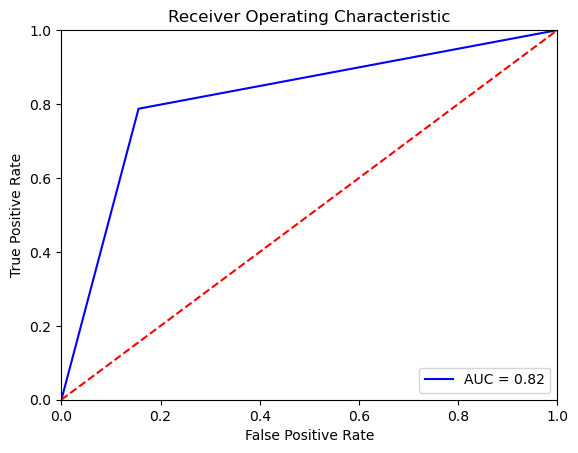

In [55]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_pred_log_test)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Adabost

In [56]:
from sklearn.ensemble import AdaBoostClassifier # combine model
from sklearn.tree import DecisionTreeClassifier # determine deep model

In [57]:
# input model as base estimator
dt = DecisionTreeClassifier(max_depth=5)

# Make Hyperparamater
ada = AdaBoostClassifier(
           base_estimator=dt, # model
           n_estimators=100, # sum of estimator
           learning_rate=0.1, # learning rate
           random_state=42)

In [58]:
# Make predict and fit
ada = ada.fit(X_train_clean, y_train_copy) # fit data 
y_train_pred_ada = ada.predict(X_train_clean) # predict data X_train

In [59]:
# check Confusion metrics
confusion_matrix(y_train_copy,
                 y_train_pred_ada)

array([[31184,   753],
       [ 2062,  2169]], dtype=int64)

In [60]:
# Tampilkan score
print(classification_report(y_true = y_train_copy,
                            y_pred = y_train_pred_ada,
                            target_names = ["NO (0)", "YES (1)"]))

              precision    recall  f1-score   support

      NO (0)       0.94      0.98      0.96     31937
     YES (1)       0.74      0.51      0.61      4231

    accuracy                           0.92     36168
   macro avg       0.84      0.74      0.78     36168
weighted avg       0.92      0.92      0.92     36168



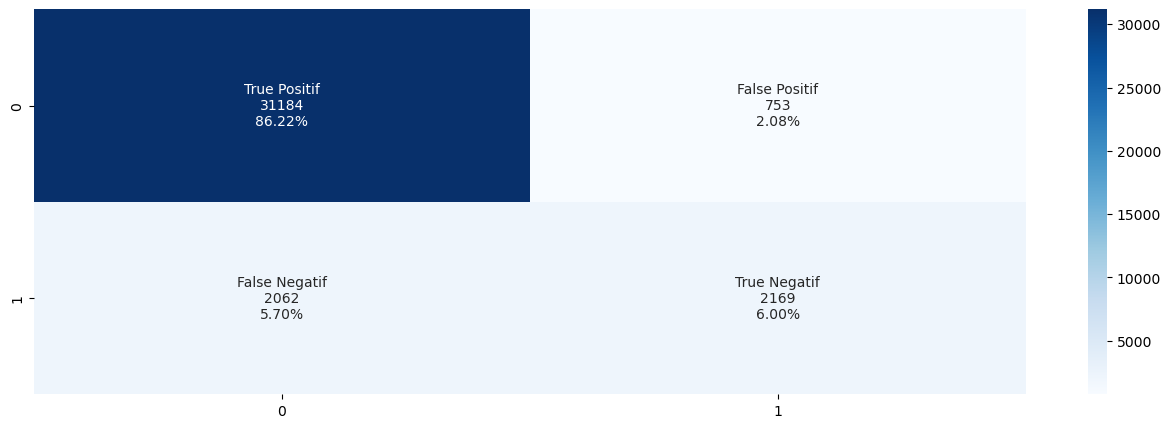

In [61]:
# look heatmap fn,fp,tp,tn

group_names = ['True Positif', 'False Positif', 'False Negatif', 'True Negatif'] # for label
test_cnf_matrix = confusion_matrix(y_train_copy,y_train_pred_ada) # input data test
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()] # format value
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)] # percentage of metric
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)] # looping metrics values
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

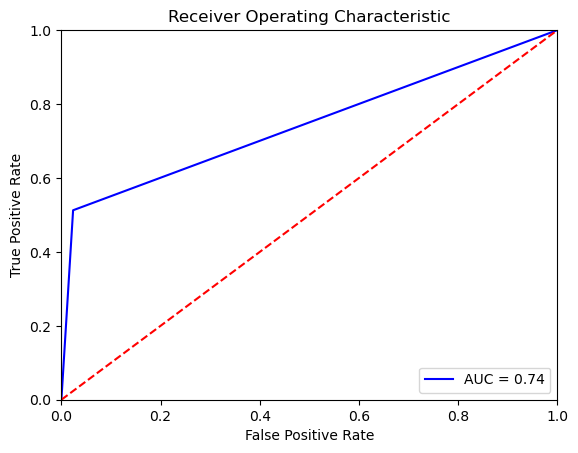

In [62]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_train_copy,
                                         y_train_pred_ada)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
# Make model
ada = ada.fit(X_train_clean, y_train_copy) # fit data
y_test_pred_ada = ada.predict(X_test_clean) # predict model data X_test

In [64]:
# check Confusion metrics
confusion_matrix(y_test,
                 y_test_pred_ada)

array([[7748,  237],
       [ 632,  426]], dtype=int64)

In [65]:
# Tampilkan score
print(classification_report(y_true = y_test,
                            y_pred = y_test_pred_ada,
                            target_names = ["NO (0)", "YES (1)"]))

              precision    recall  f1-score   support

      NO (0)       0.92      0.97      0.95      7985
     YES (1)       0.64      0.40      0.50      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



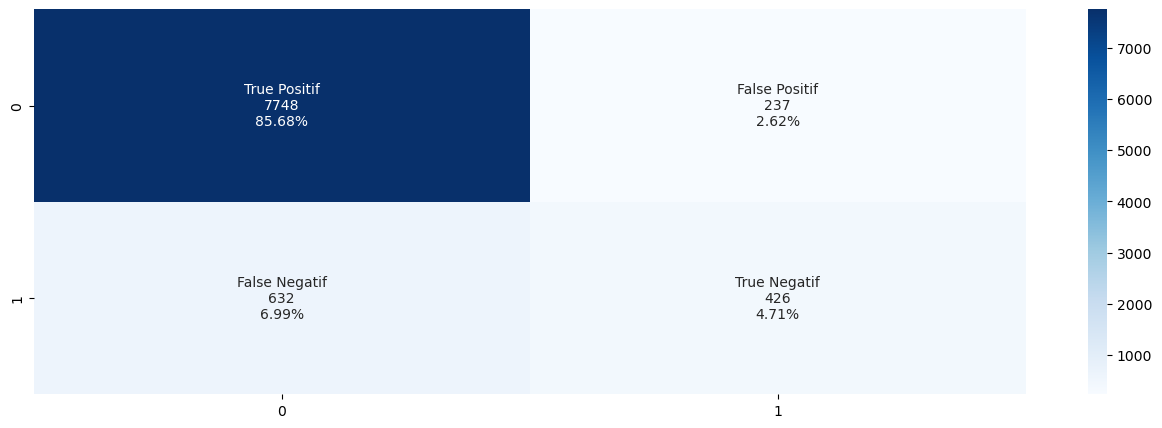

In [66]:
# look heatmap fn,fp,tp,tn

group_names = ['True Positif', 'False Positif', 'False Negatif', 'True Negatif'] # for label
test_cnf_matrix = confusion_matrix(y_test,y_test_pred_ada) # input data test
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()] # format value
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)] # percentage of metric
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)] # looping metrics values
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

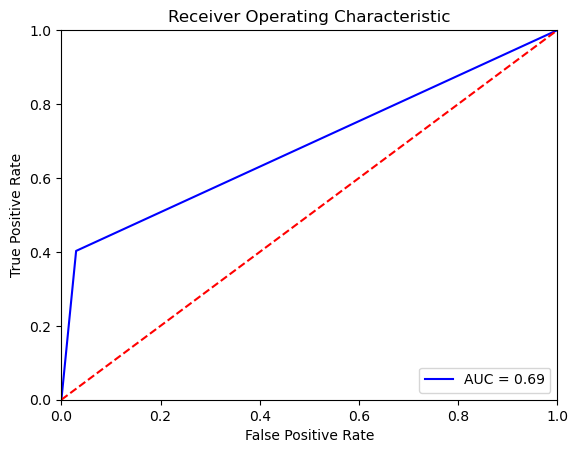

In [67]:
# ROC Curve
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test,
                                         y_test_pred_ada)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Check Scores Metrics

In [68]:
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score  #check Metrics

# Check Metric Positif
# model Random Forest Data Train
print('>>>>>Metrics Data Train<<<<<')
print('Recall: {}'.format(recall_score(y_train, y_pred))) # check score recall
print('Precision: {}'.format(precision_score(y_train, y_pred))) # check score precision
print('F1-score: {}'.format(f1_score(y_train, y_pred))) # check score f1_score
print('Accuracy: {}'.format(accuracy_score(y_train, y_pred))) # check score accuracy

# model Random Forest Data Test
print('>>>>>Metrics Data Test<<<<<')
print('Recall: {}'.format(recall_score(y_test, y_pred_test))) # check score recall
print('Precision: {}'.format(precision_score(y_test, y_pred_test))) # check score precision
print('F1-score: {}'.format(f1_score(y_test, y_pred_test))) # check score f1_score
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_test))) # check score accuracy

>>>>>Metrics Data Train<<<<<
Recall: 0.9984657294047656
Precision: 0.9996238244514106
F1-score: 0.9990444413114651
Accuracy: 0.9990449948335786
>>>>>Metrics Data Test<<<<<
Recall: 0.44706994328922495
Precision: 0.5080558539205156
F1-score: 0.4756158873805933
Accuracy: 0.884662169633971


In [69]:
# Check Metric Positif
# model Random Forest Data Train
print('>>>>>Metrics Data Train<<<<<')
print('Recall: {}'.format(recall_score(y_train_copy, y_pred_log)))  # check score recall
print('Precision: {}'.format(precision_score(y_train_copy, y_pred_log))) # check score precision
print('F1-score: {}'.format(f1_score(y_train_copy, y_pred_log))) # check score f1_score
print('Accuracy: {}'.format(accuracy_score(y_train_copy, y_pred_log))) # check score accuracy


# model Random Forest Data Test
print('>>>>>Metrics Data Test<<<<<')
print('Recall: {}'.format(recall_score(y_test, y_pred_log_test))) # check score recall
print('Precision: {}'.format(precision_score(y_test, y_pred_log_test)))  # check score precision
print('F1-score: {}'.format(f1_score(y_test, y_pred_log_test))) # check score f1_score
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_log_test))) # check score accuracy

>>>>>Metrics Data Train<<<<<
Recall: 0.8213188371543371
Precision: 0.42238969247599367
F1-score: 0.557874458179483
Accuracy: 0.8477106834771069
>>>>>Metrics Data Test<<<<<
Recall: 0.7873345935727788
Precision: 0.4014457831325301
F1-score: 0.5317586977338015
Accuracy: 0.8377750746433705


In [70]:
# Check Metric Positif
# model Adabost Data Train
print('>>>>>Metrics Data Train<<<<<')
print('Recall: {}'.format(recall_score(y_train_copy, y_train_pred_ada))) # check score recall
print('Precision: {}'.format(precision_score(y_train_copy, y_train_pred_ada))) # check score precision
print('F1-score: {}'.format(f1_score(y_train_copy, y_train_pred_ada))) # check score f1_score
print('Accuracy: {}'.format(accuracy_score(y_train_copy, y_train_pred_ada))) # check score accuracy


# model Adabost Data Test
print('>>>>>Metrics Data Test<<<<<')
print('Recall: {}'.format(recall_score(y_test, y_test_pred_ada)))  # check score recall
print('Precision: {}'.format(precision_score(y_test, y_test_pred_ada)))  # check score precision
print('F1-score: {}'.format(f1_score(y_test, y_test_pred_ada)))  # check score f1_score
print('Accuracy: {}'.format(accuracy_score(y_test, y_test_pred_ada)))  # check score accuracy

>>>>>Metrics Data Train<<<<<
Recall: 0.5126447648310092
Precision: 0.742299794661191
F1-score: 0.6064588284635817
Accuracy: 0.9221687679716877
>>>>>Metrics Data Test<<<<<
Recall: 0.40264650283553877
Precision: 0.6425339366515838
F1-score: 0.495061011040093
Accuracy: 0.9039035718235099
